# Optimizing Gym Equipment Utilization

## Introduction
GoodLife has measured how many people were in this gym once every 10 minutes over the last year. The goal is to predict how crowded the gym will be in the future so that we can persuade people to use the facilities when it's not crowded. This notebook explores the data, performs exploratory data analysis (EDA), and builds predictive models to achieve this goal.

## Data Description
The dataset consists of 26,000 observations of people counts over the last year. The features include:
- `number_people`: The target variable representing the number of people in the gym.
- `date`: The datetime of data recording.
- `timestamp`: The number of seconds since the beginning of the day.
- `day_of_week`: The day of the week (0 for Monday, 6 for Sunday).
- `is_weekend`: A boolean flag indicating if the day is a weekend.
- `is_holiday`: A boolean flag indicating if the day is a federal holiday.
- `temperature`: The temperature in degrees Fahrenheit at the time of recording.
- `is_start_of_semester`: A boolean flag indicating if it is the beginning of a school semester.
- `is_during_semester`: A boolean flag indicating if it is during a school semester.
- `month`: The month of the year.
- `hour`: The hour of the day.

## Exploratory Data Analysis (EDA)


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/cvvdatasetgym/problem1.csv')

# Display basic statistics and data types
data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


### Distribution of Target Variable (`number_people`)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


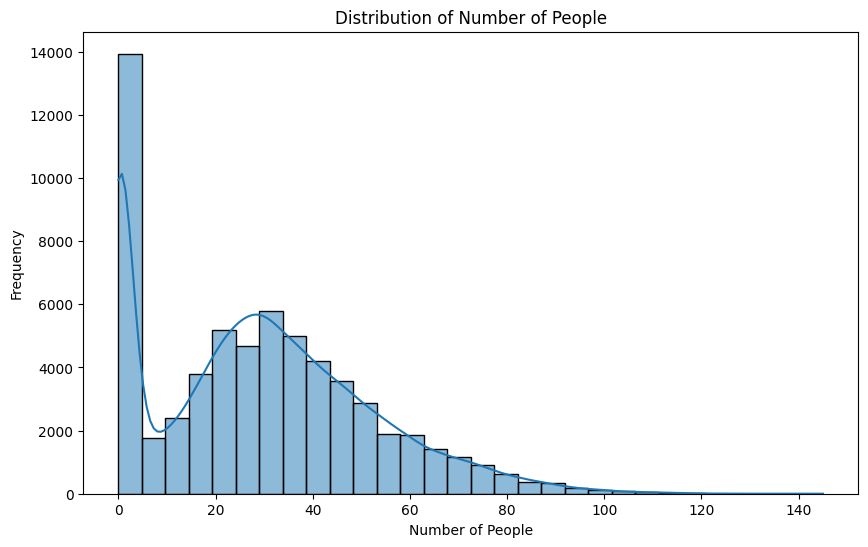

In [2]:
# Distribution plot for the number of people
plt.figure(figsize=(10, 6))
sns.histplot(data['number_people'], bins=30, kde=True)
plt.title('Distribution of Number of People')
plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.show()

### Number of People vs. Time of Day

/tmp/ipykernel_34/3815258778.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='number_people', data=data, ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


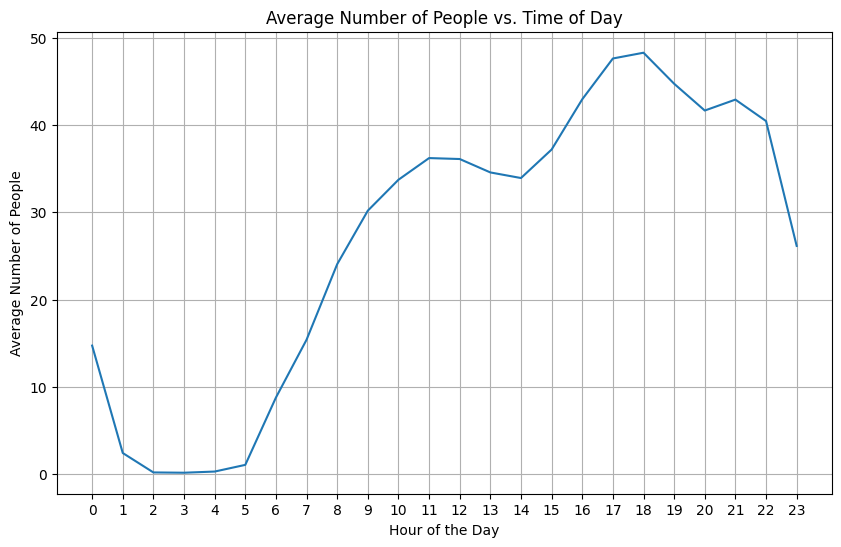

In [3]:
# Line plot to visualize the average number of people at different hours of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='number_people', data=data, ci=None)
plt.title('Average Number of People vs. Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of People')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Number of People vs. Day of the Week

/tmp/ipykernel_34/3756168038.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day_of_week', y='number_people', data=data, ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


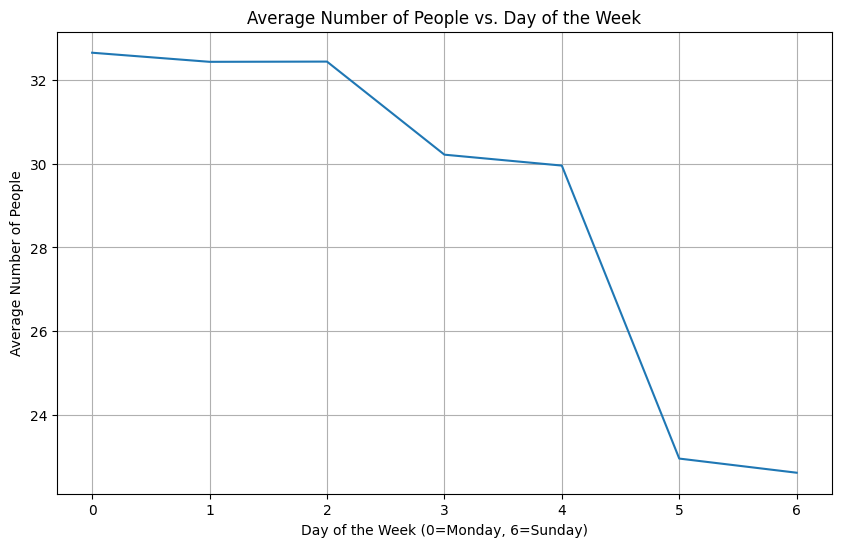

In [4]:
# Line plot to visualize the average number of people on different days of the week
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='number_people', data=data, ci=None)
plt.title('Average Number of People vs. Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Number of People')
plt.grid(True)
plt.show()


### Number of People vs. Temperature

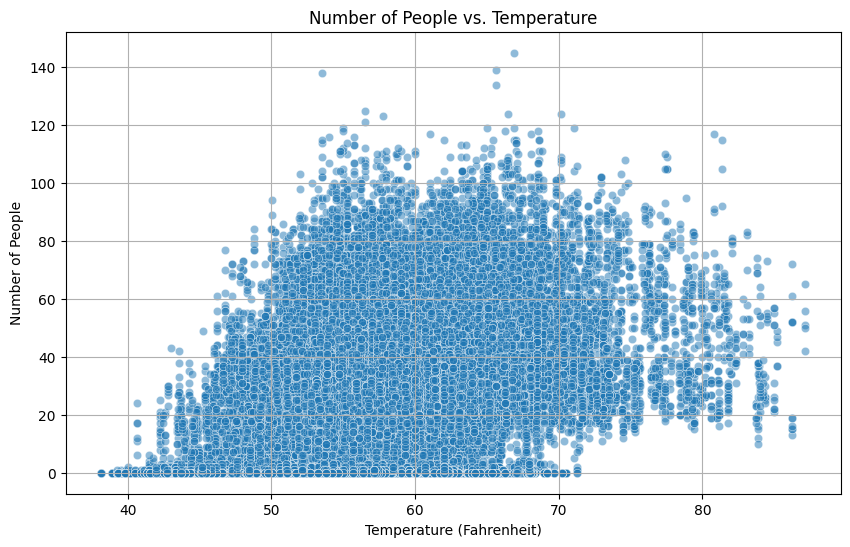

In [5]:
# Scatter plot to visualize the relationship between temperature and number of people
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='number_people', data=data, alpha=0.5)
plt.title('Number of People vs. Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

### Number of People on Weekends vs. Weekdays

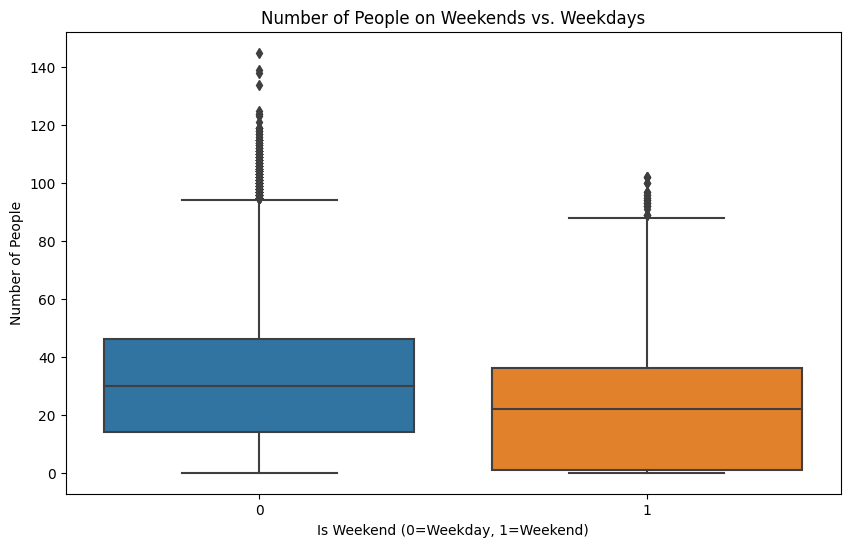

In [6]:
# Boxplot to compare the number of people on weekends vs. weekdays
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='number_people', data=data)
plt.title('Number of People on Weekends vs. Weekdays')
plt.xlabel('Is Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Number of People')
plt.show()


### Number of People During Holidays vs. Non-Holidays

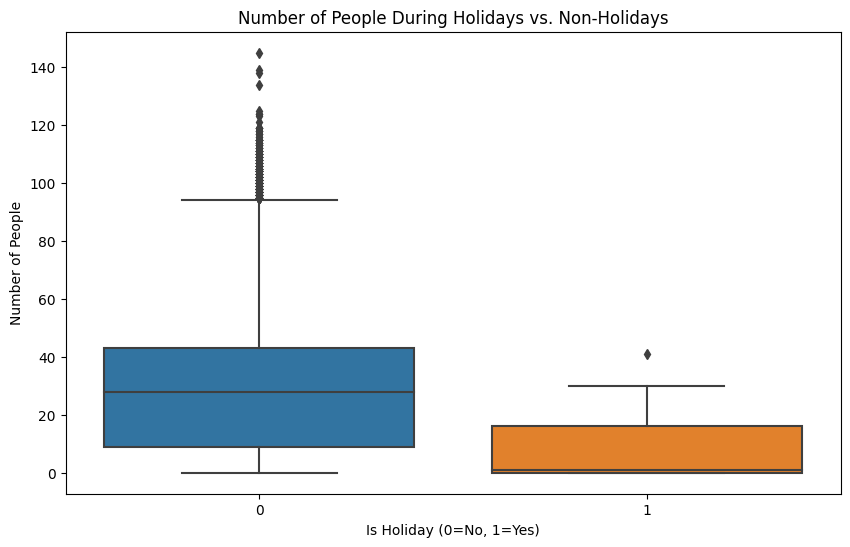

In [7]:
# Boxplot to compare the number of people during holidays vs. non-holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_holiday', y='number_people', data=data)
plt.title('Number of People During Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday (0=No, 1=Yes)')
plt.ylabel('Number of People')
plt.show()

### Correlation Heatmap

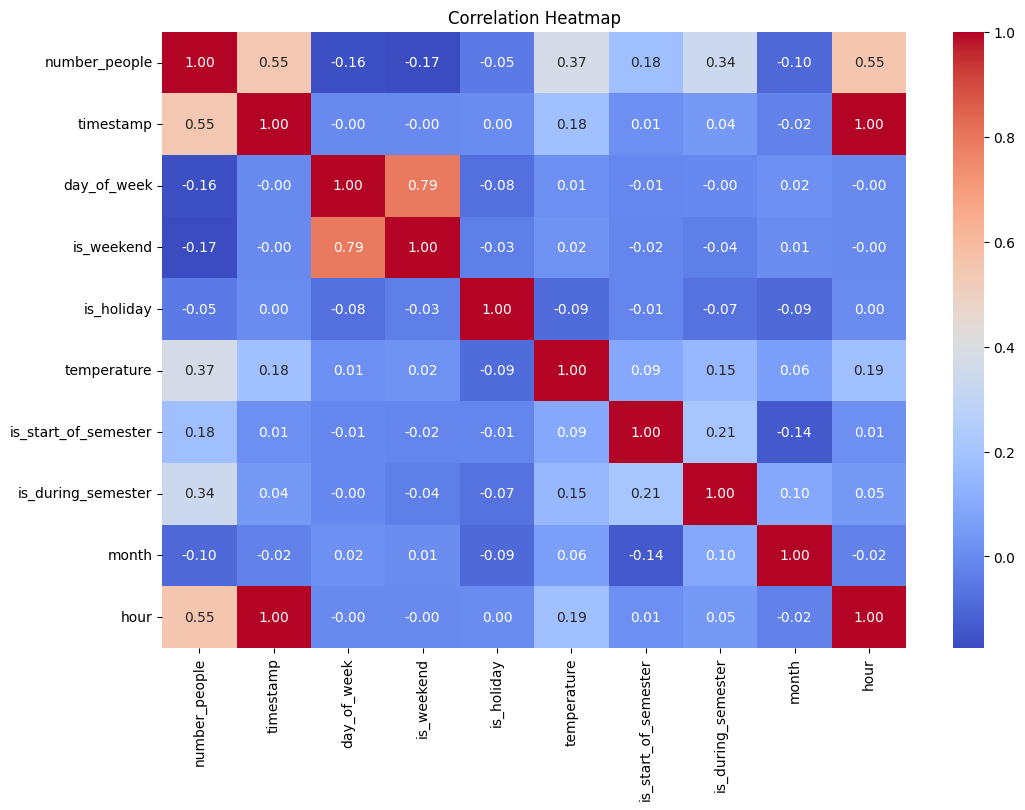

In [9]:
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

### Feature Importance Using Random Forest

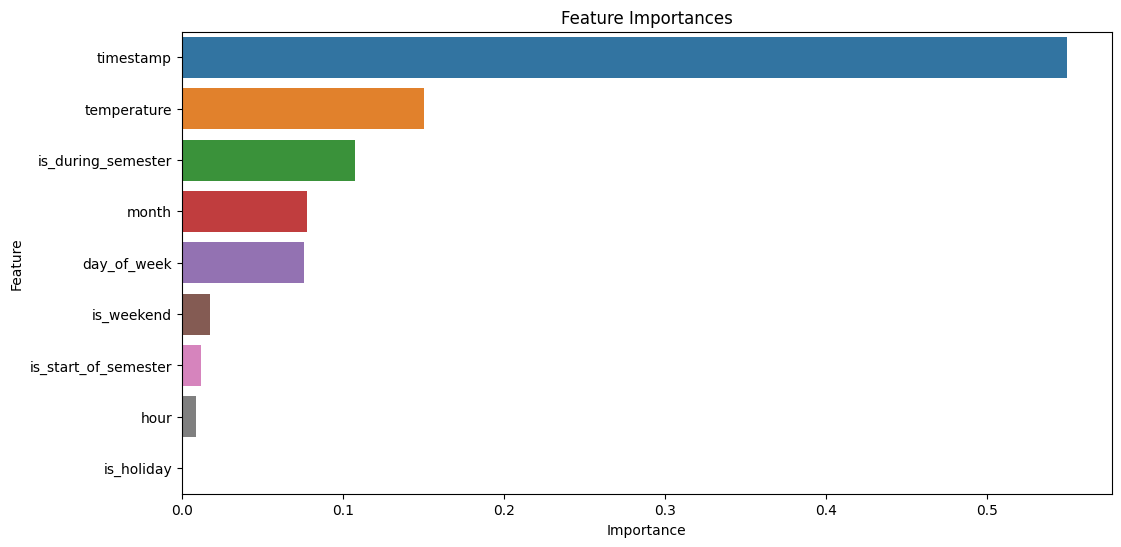

In [10]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Prepare features and target
X = data.drop(columns=['number_people', 'date'])
y = data['number_people']

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Model Building

### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 42.41418496647134
R-squared: 0.9179367829053184


### Model Evaluation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


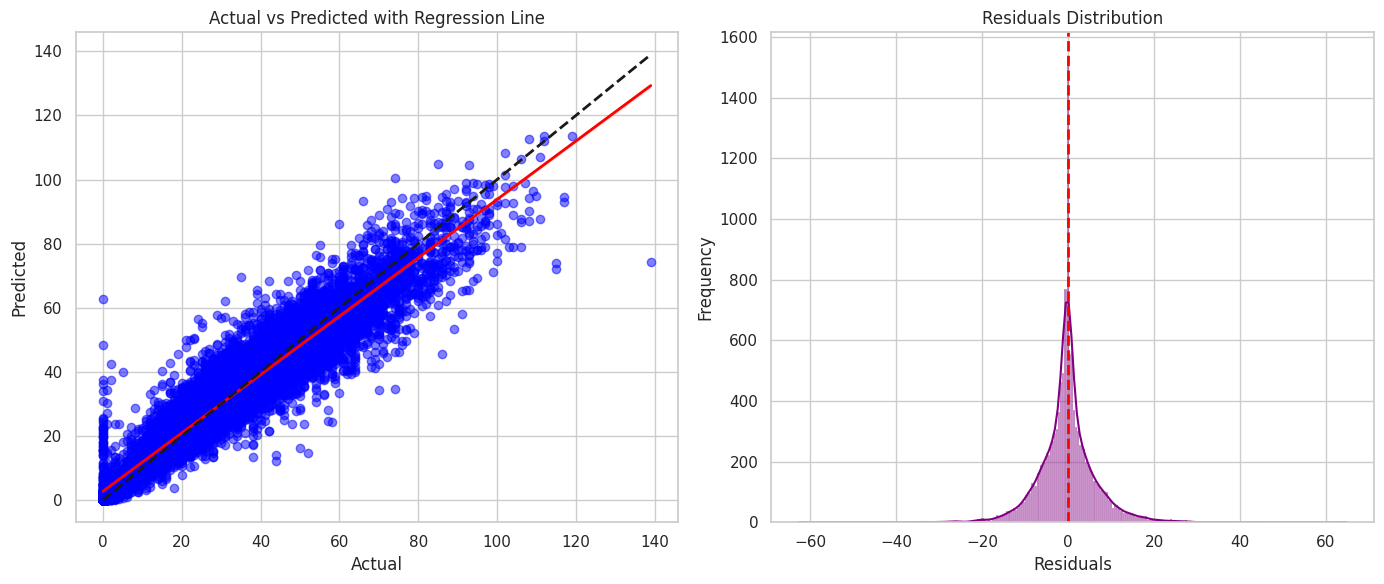

In [15]:
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Set up the figure
plt.figure(figsize=(14, 6))

# Subplot 1: Actual vs Predicted with a Regression Line
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red', 'lw':2})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted with Regression Line')

# Subplot 2: Residuals Plot
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()


## Conclusion
Model Performance:

Mean Squared Error (MSE): 42.41
R-squared (R²): 0.918

The R-squared value of approximately 0.918 indicates that the model explains about 91.8% of the variance in the number of people in the gym, which is a strong indicator of good model performance. The MSE provides an average of how much the predictions deviate from the actual values, which in this case is relatively low.

Visualization Insights:

The Actual vs. Predicted plot with a regression line shows that the predictions align well with the actual values, particularly in the lower to mid-range of the data. The red regression line closely follows the ideal fit (45-degree) line, though there is some deviation at higher values, suggesting the model may underpredict when the gym is very crowded.

The Residuals Distribution plot reveals that the residuals are generally centered around zero, with a slight skew. This suggests that the model predictions are mostly unbiased, though there are some instances where predictions are off by a significant margin.
Error Analysis:

While the model performs well overall, the scatter in predictions at higher values indicates that the model could be improved further for instances where the gym is exceptionally busy. This could potentially be addressed by incorporating more specific features, such as special events or more granular weather conditions.